## Import Packages and Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('data/5guys_flight_data.csv', low_memory=False)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME_x,DEST_AIRPORT_ID,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,1,28,1,UA,N13718,830,13930,ORD,"Chicago, IL",14262,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,28,1,EV,N14902,4020,13930,ORD,"Chicago, IL",11193,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28,1,UA,N56859,1942,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,28,1,UA,N37253,2043,13930,ORD,"Chicago, IL",12266,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,28,1,UA,N57864,2005,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

### Lazy EDA

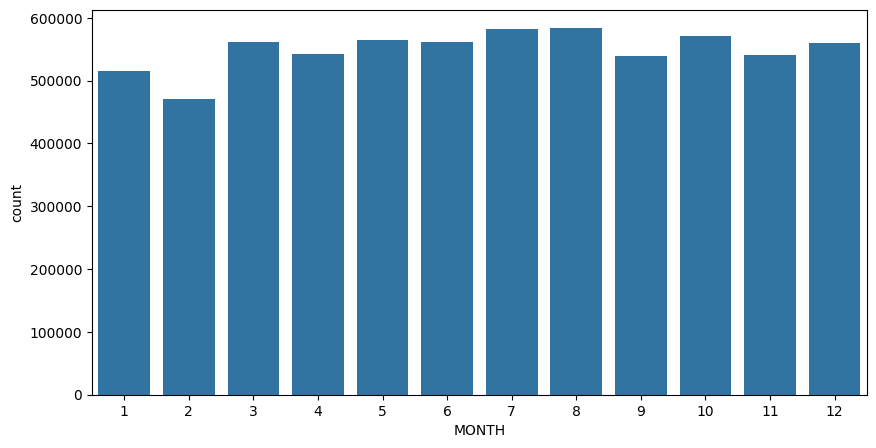

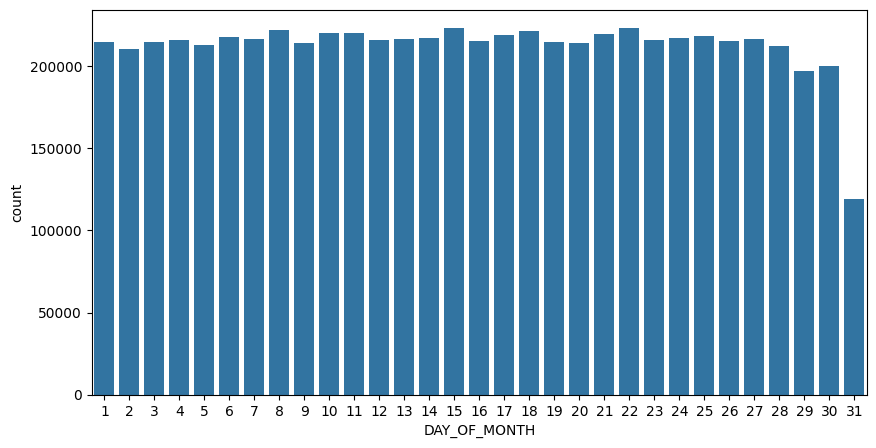

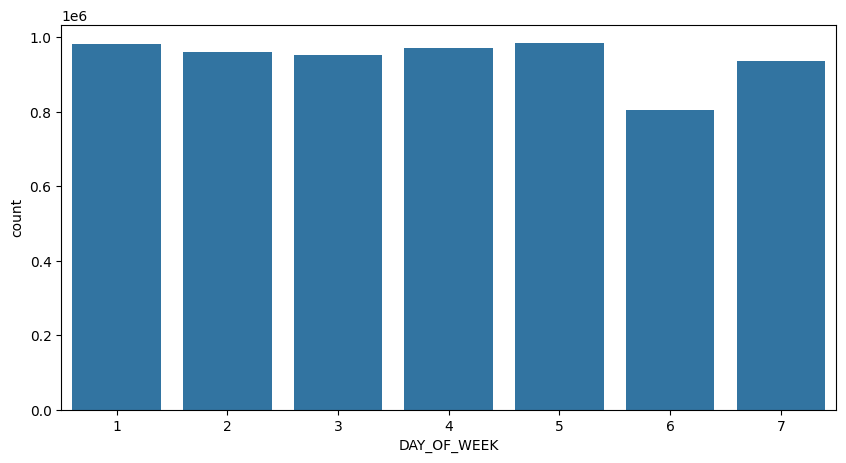

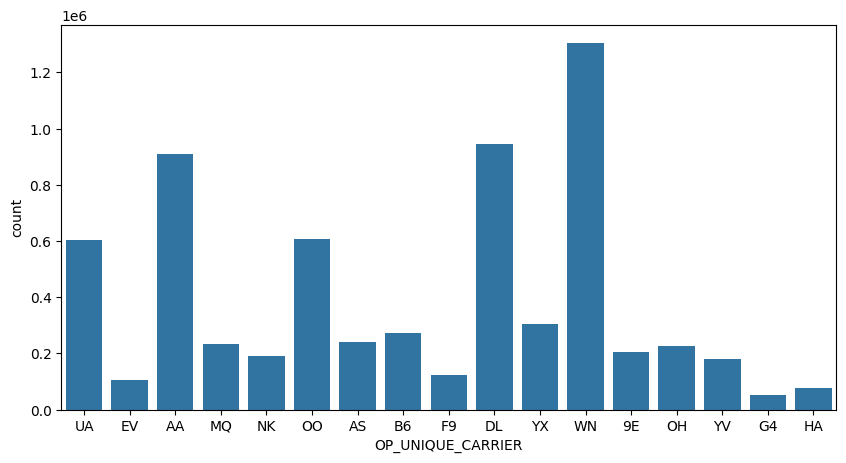

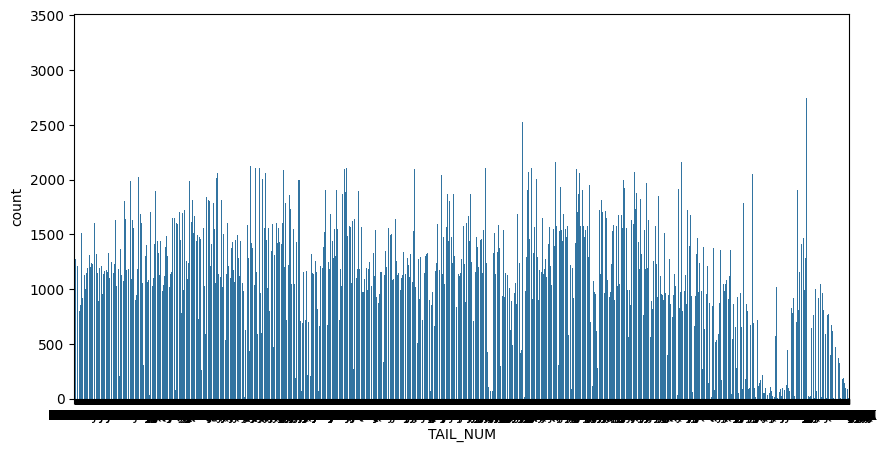

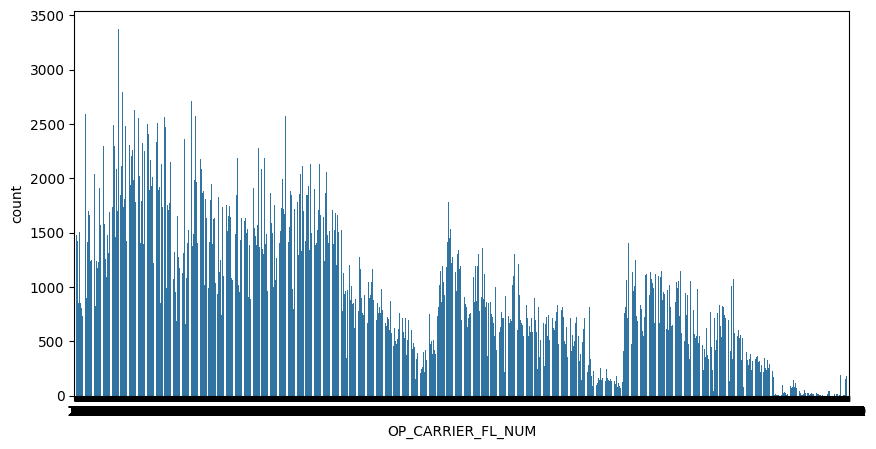

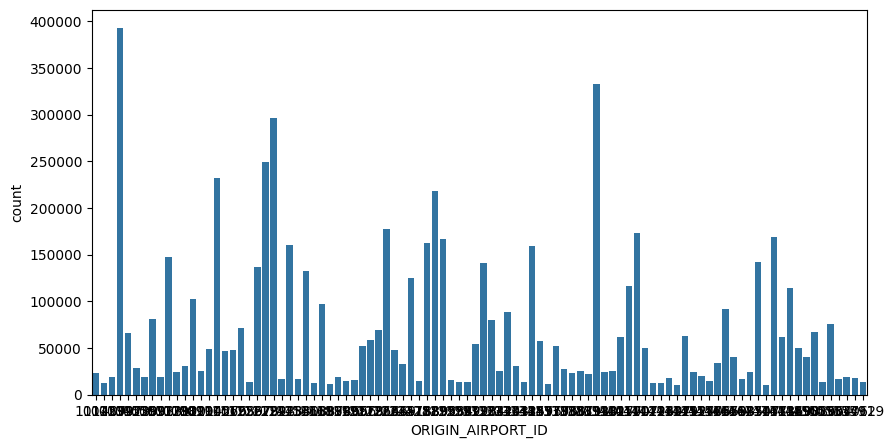

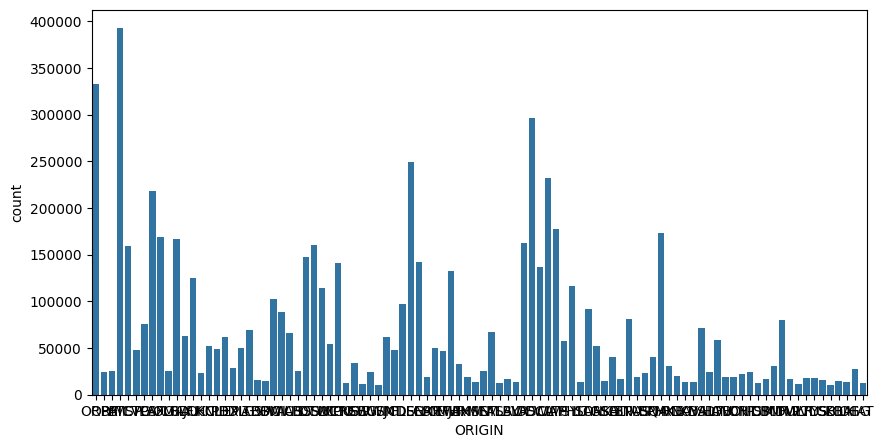

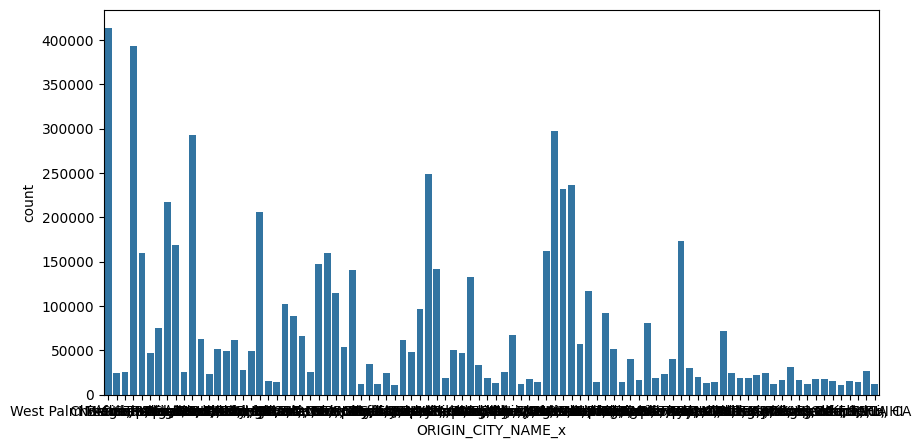

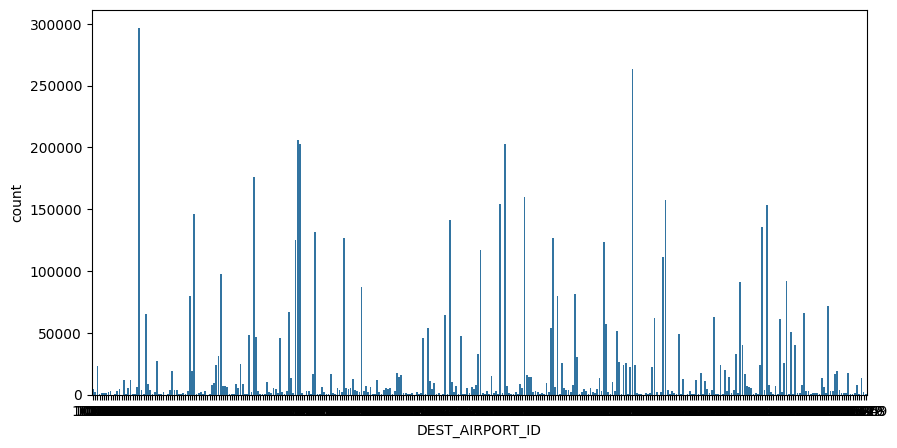

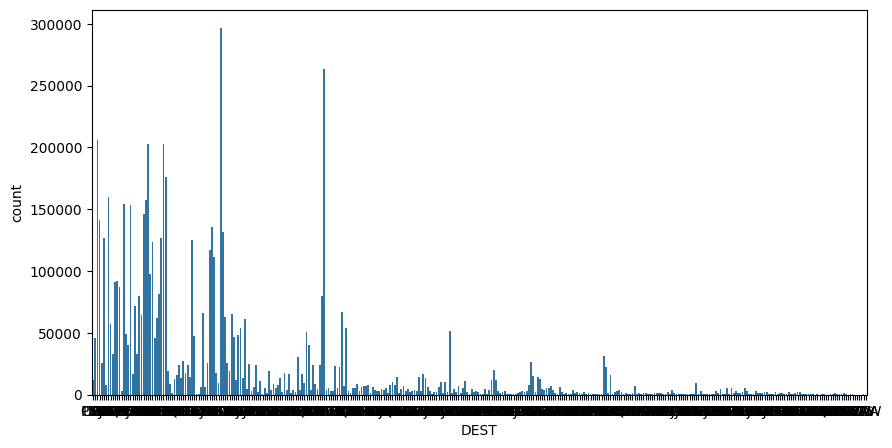

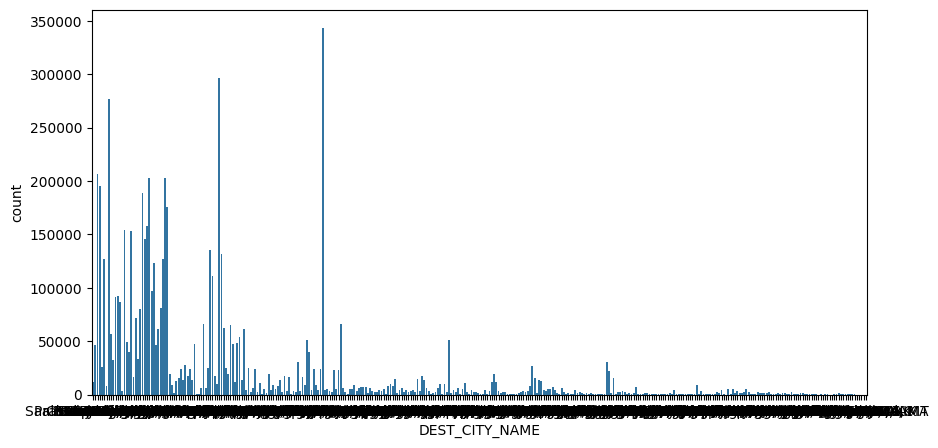

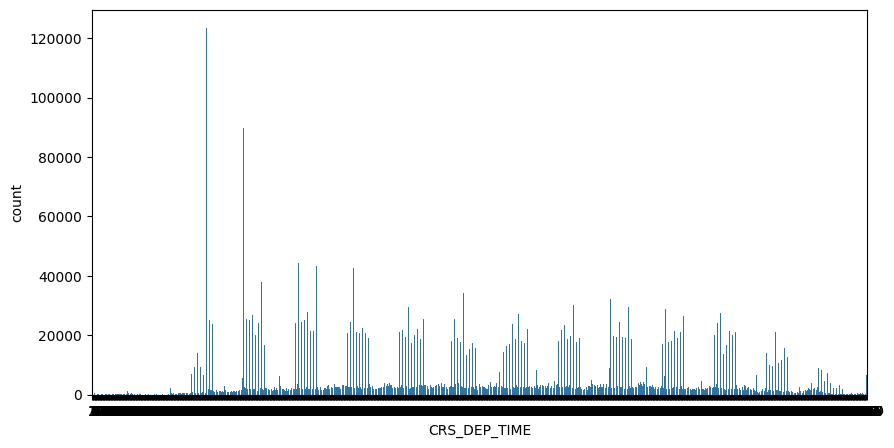

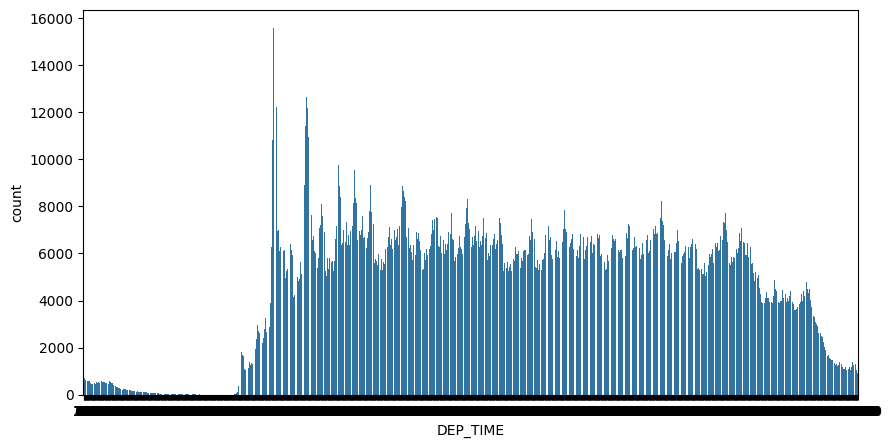

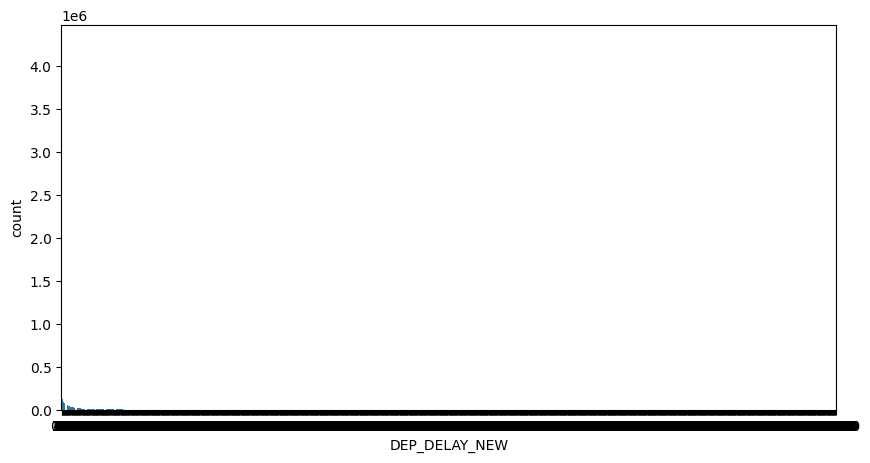

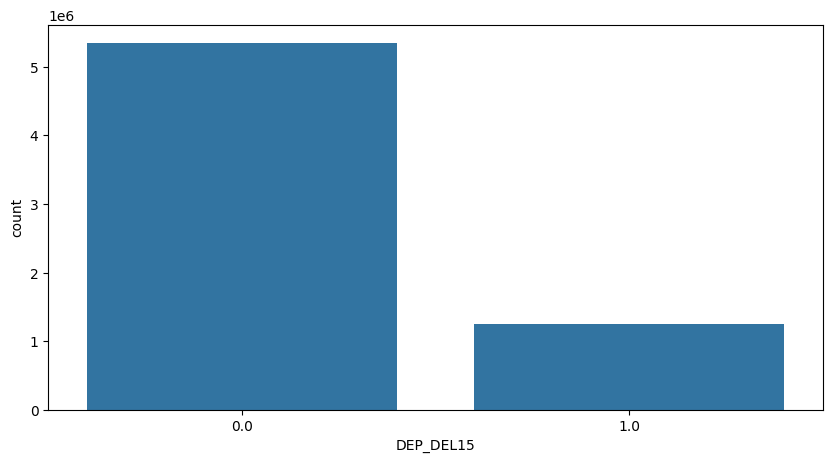

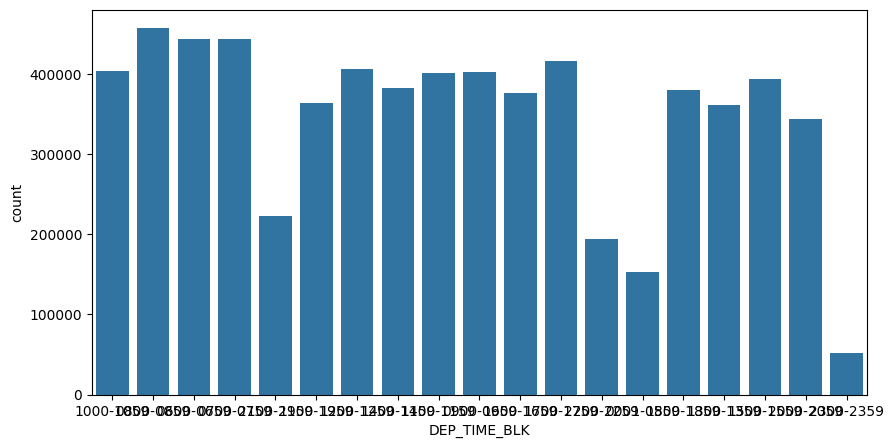

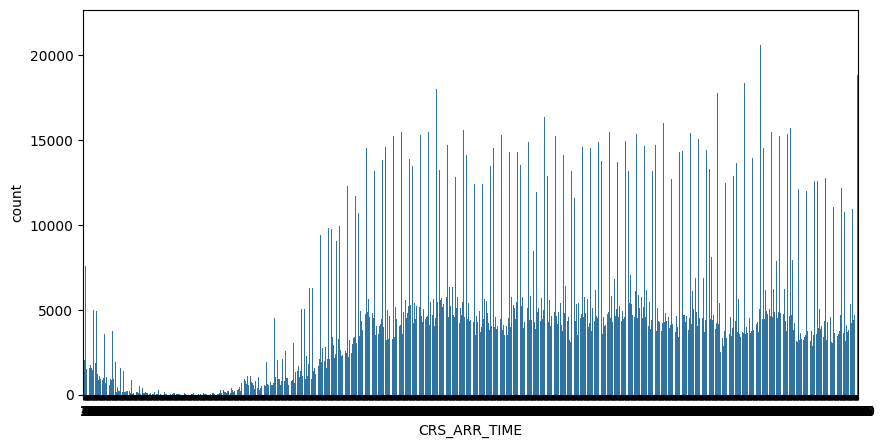

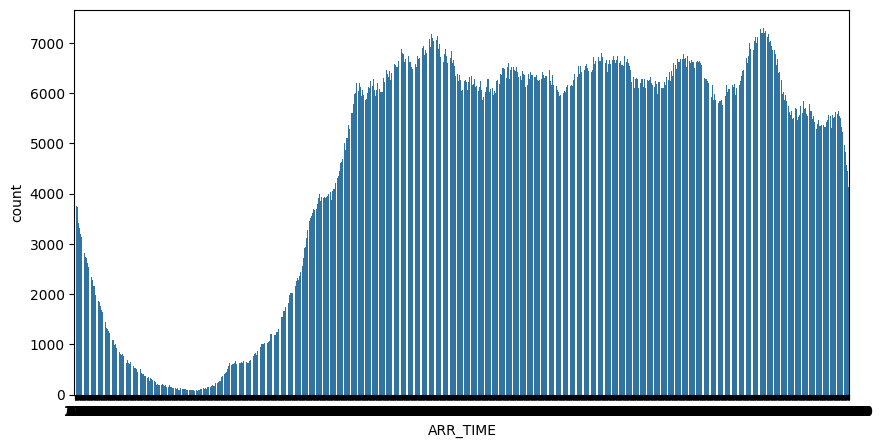

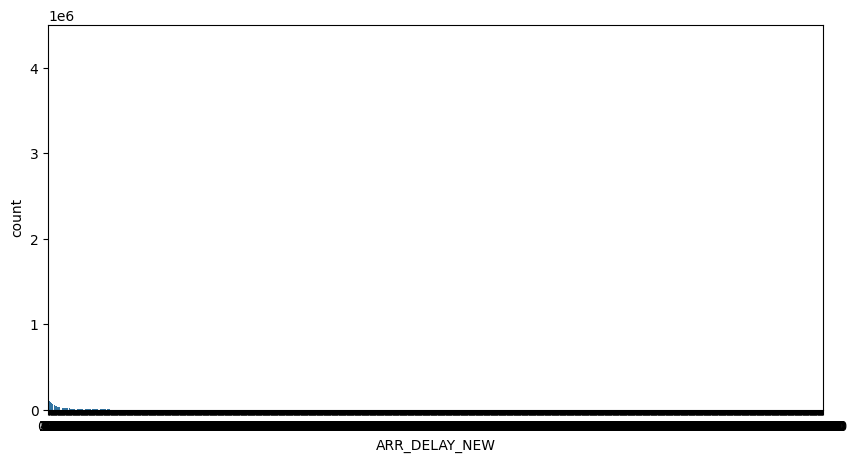

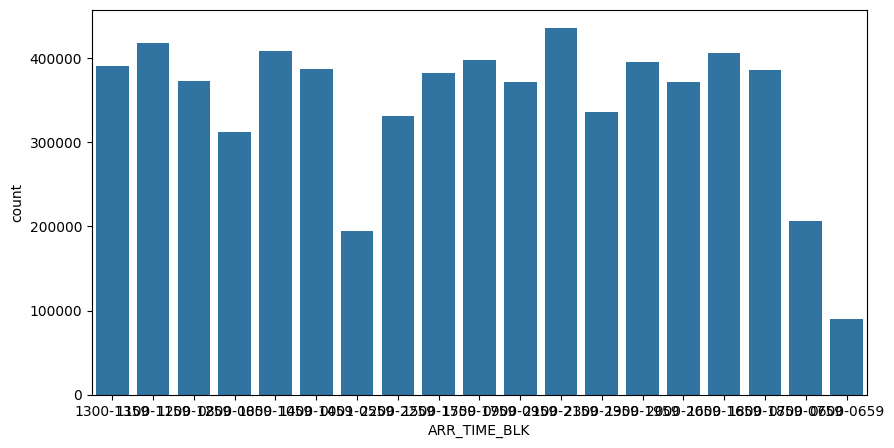

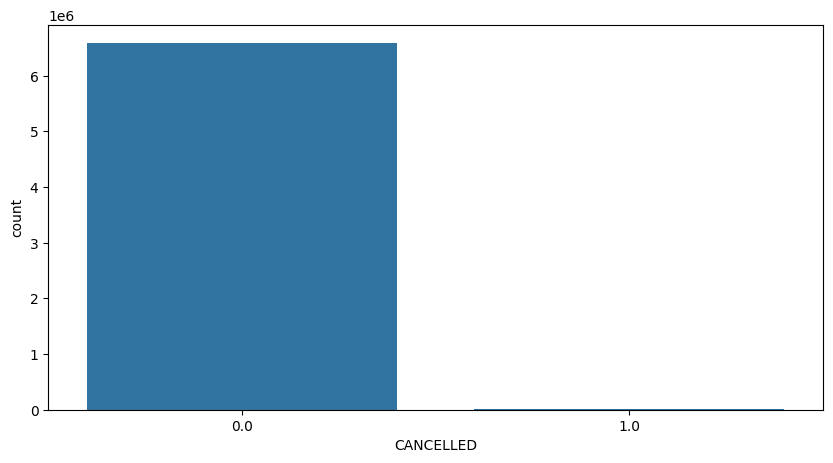

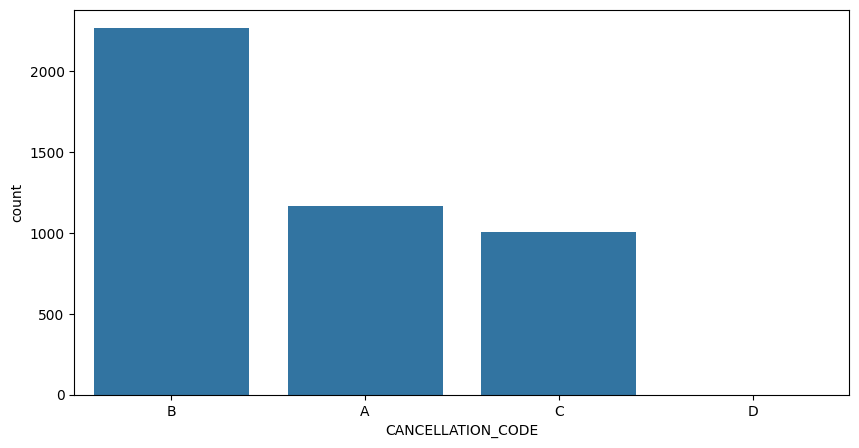

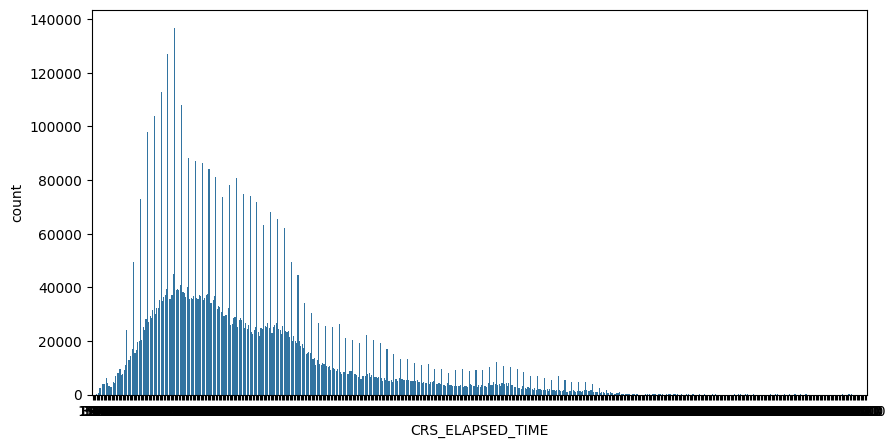

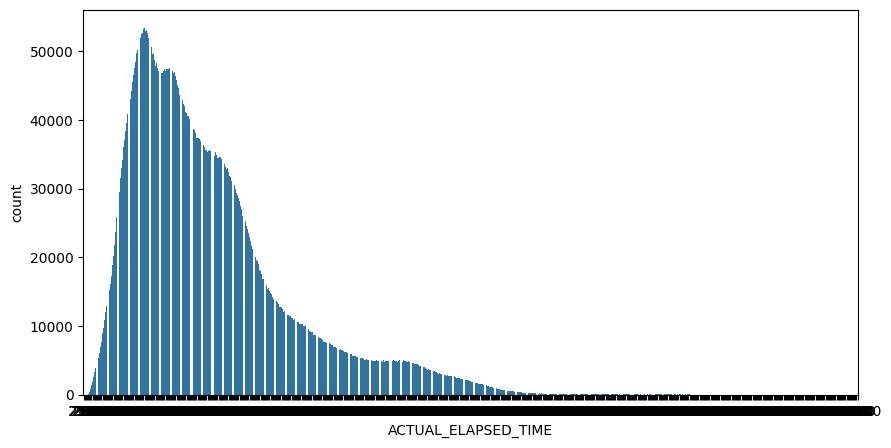

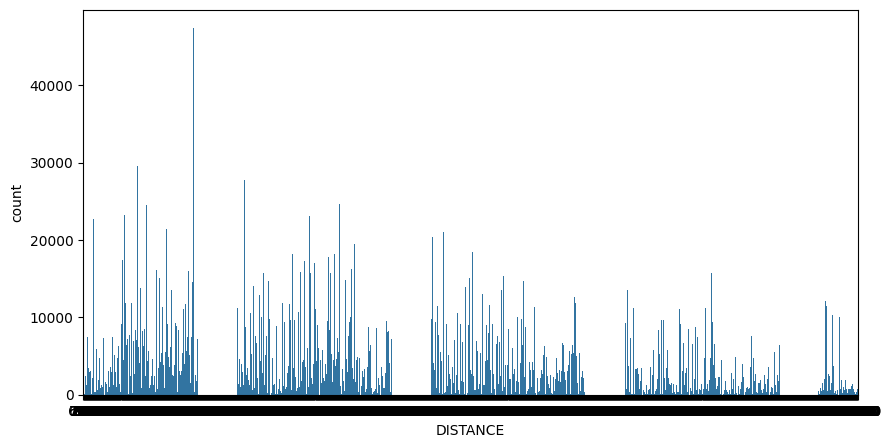

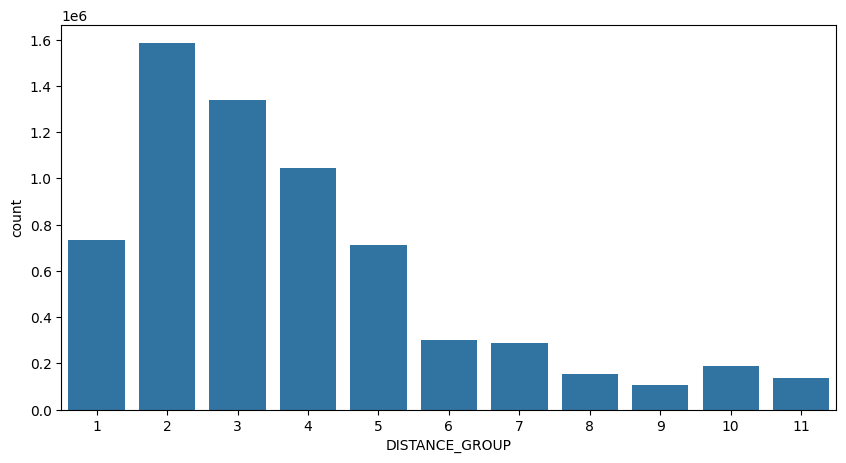

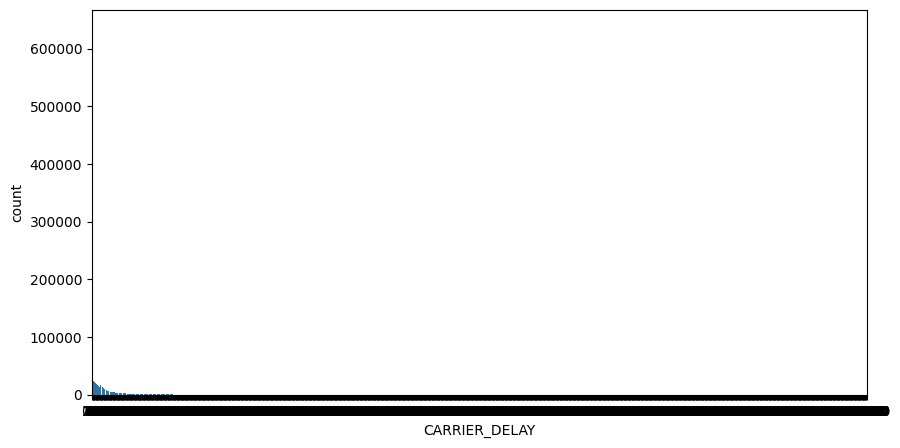

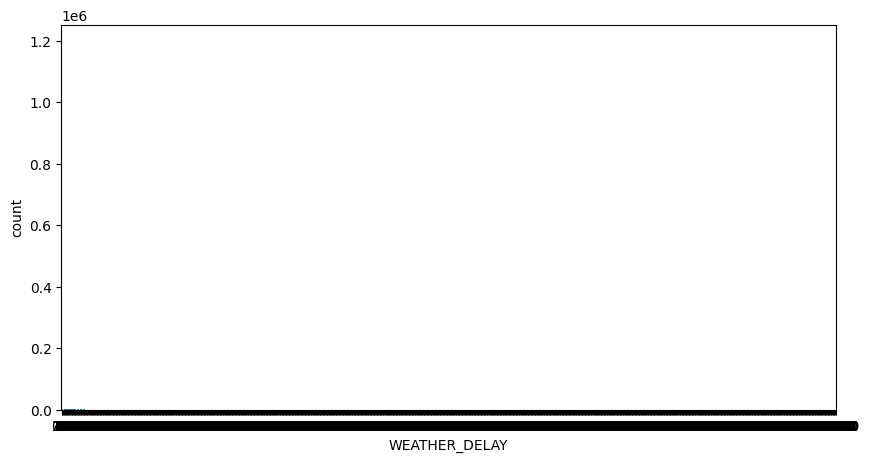

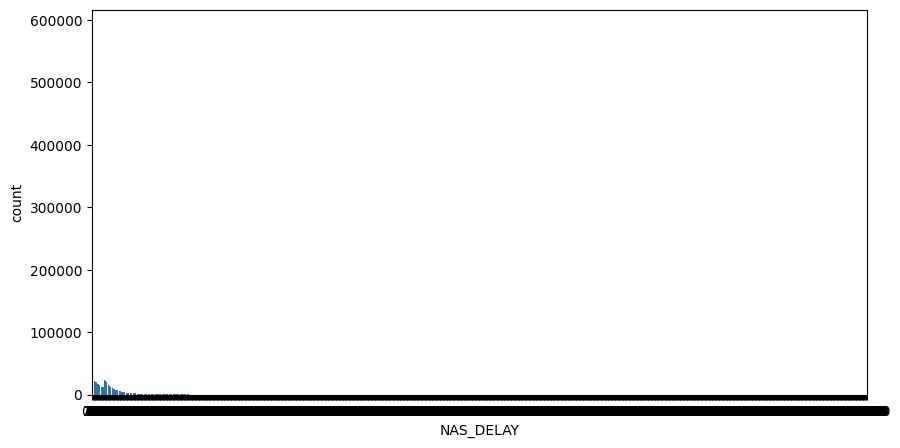

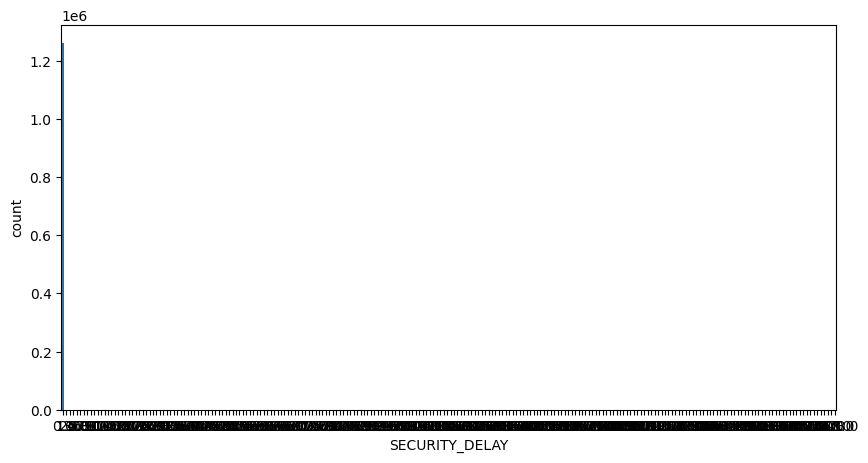

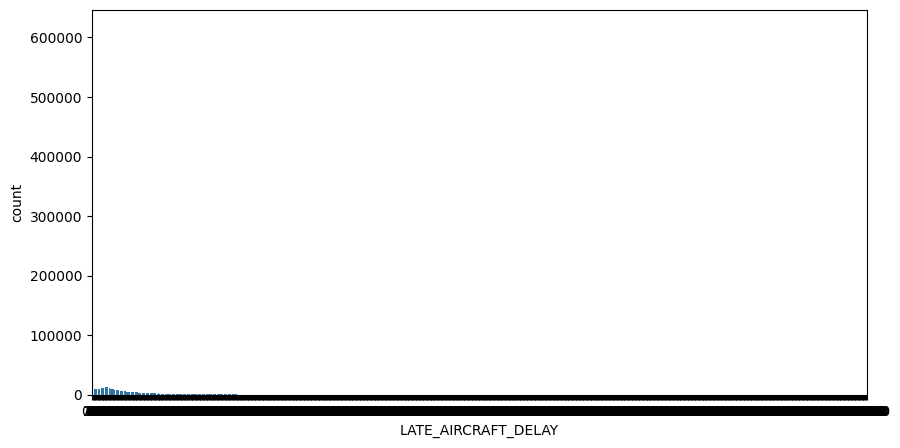

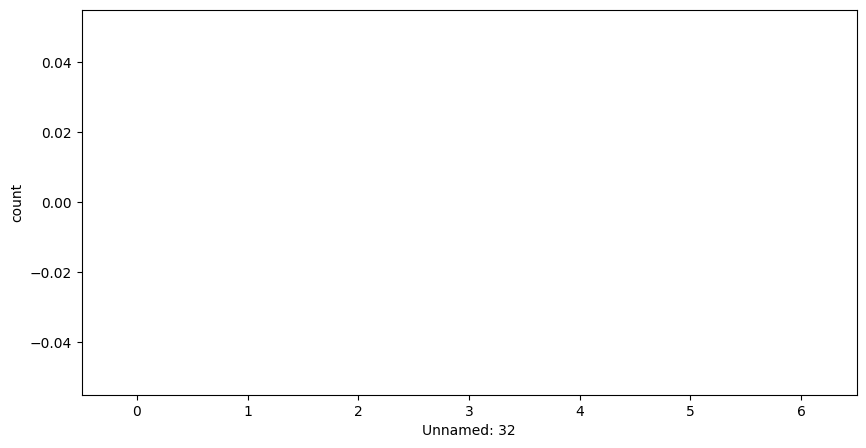

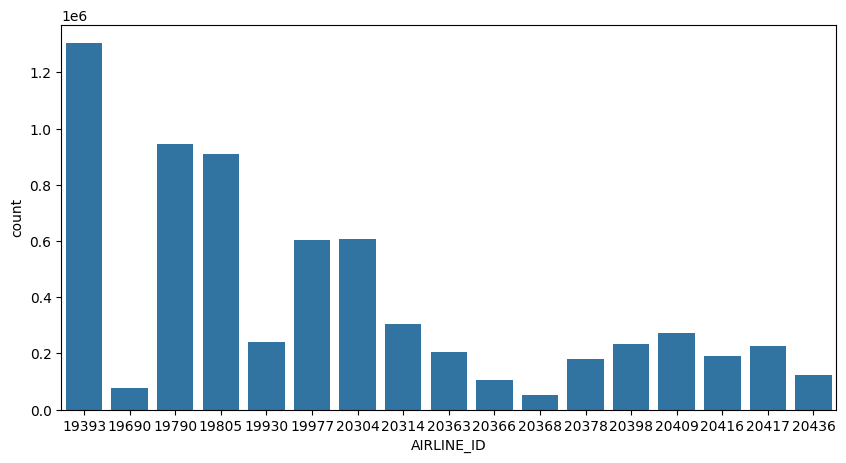

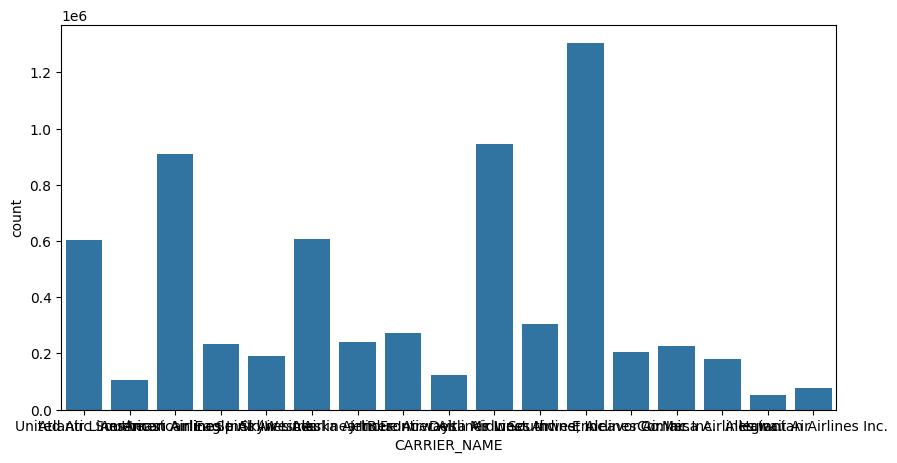

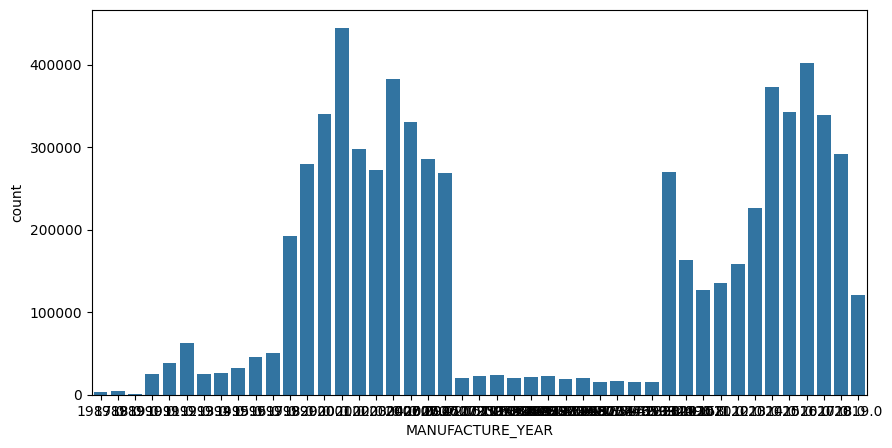

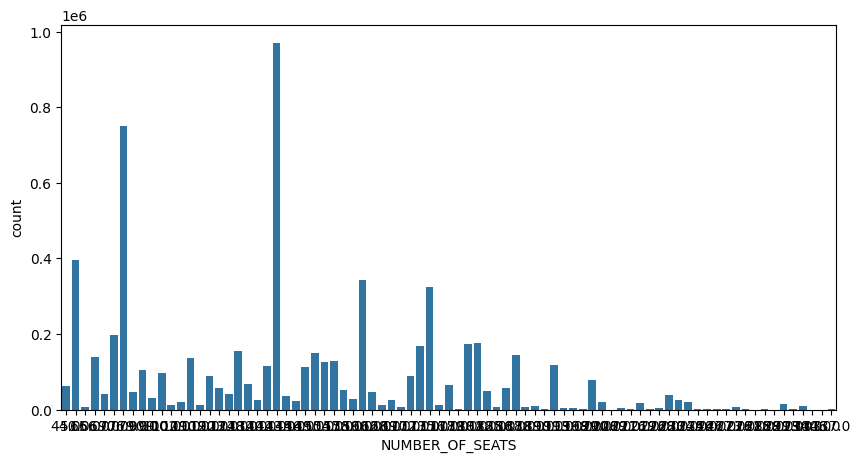

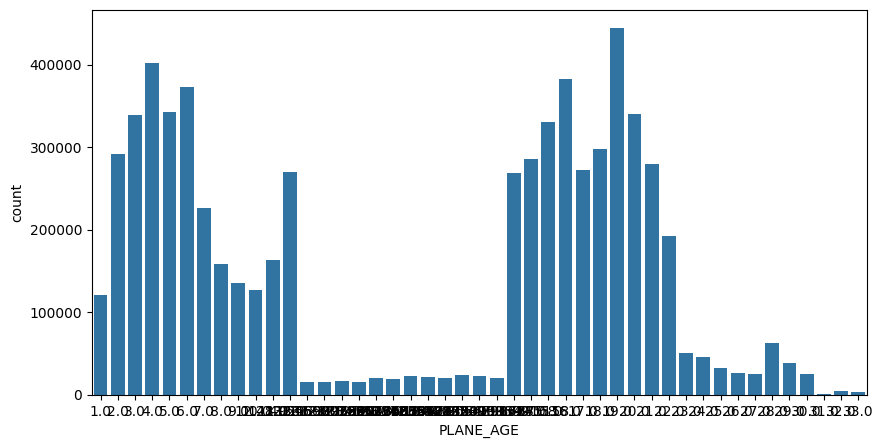

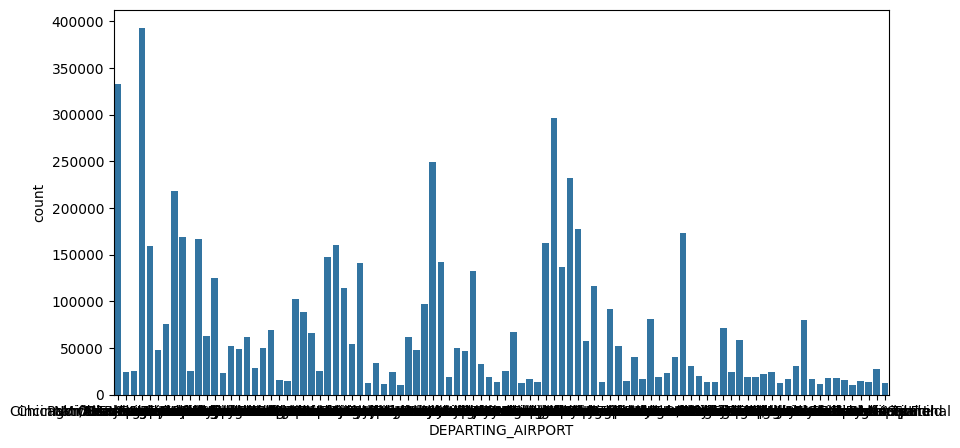

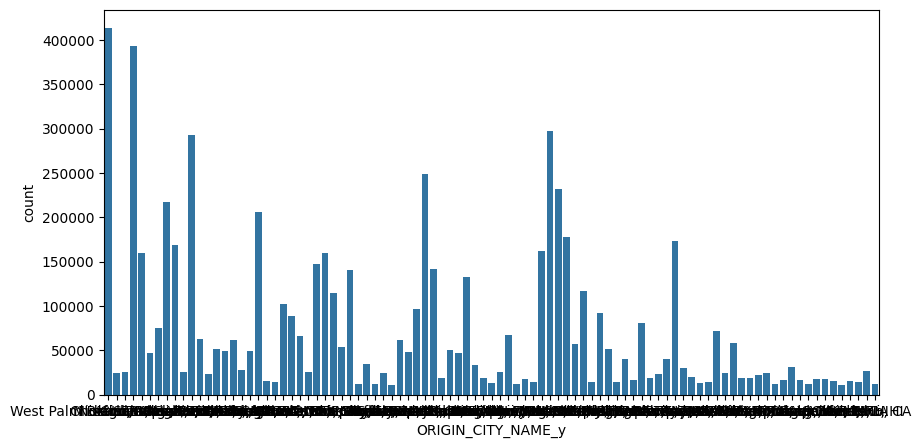

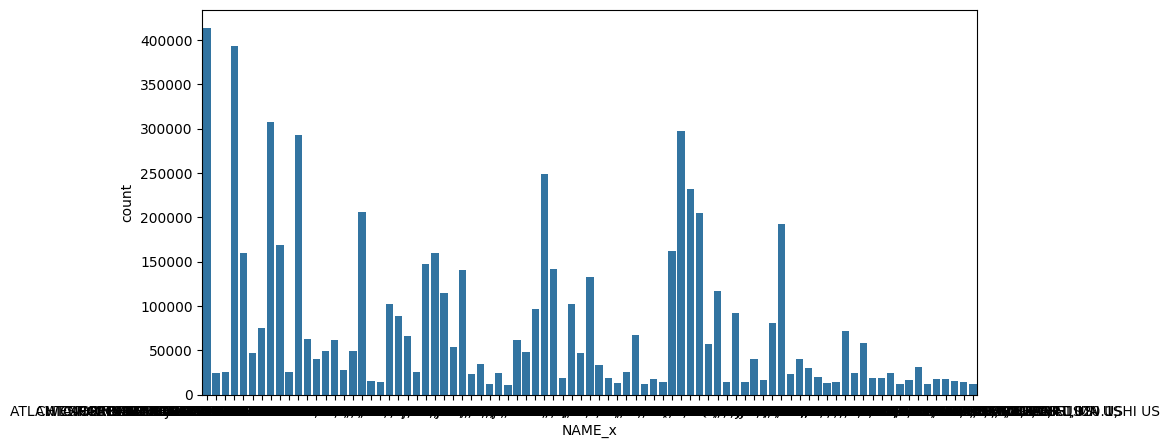

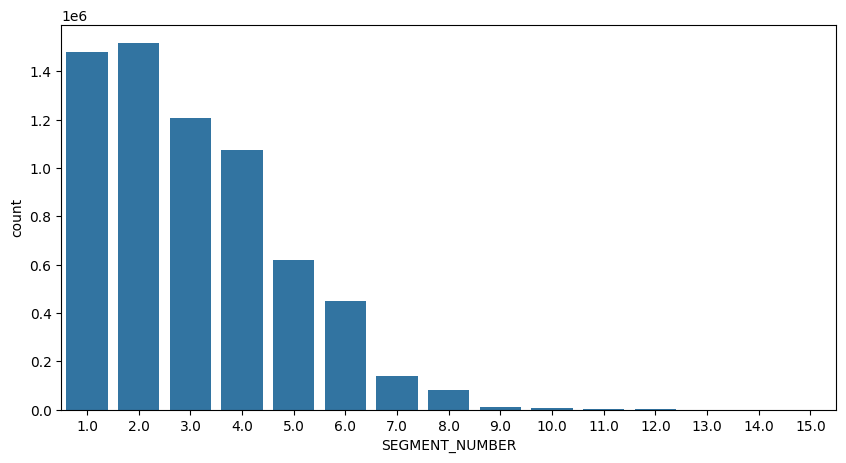

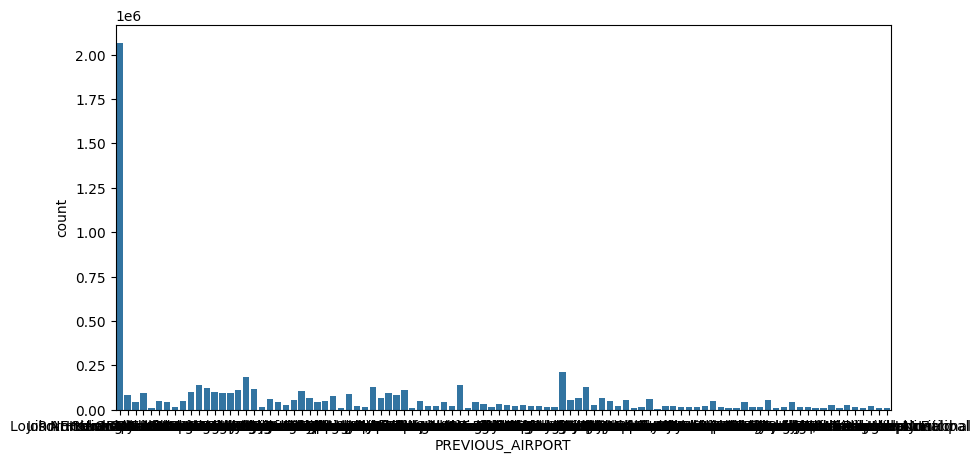

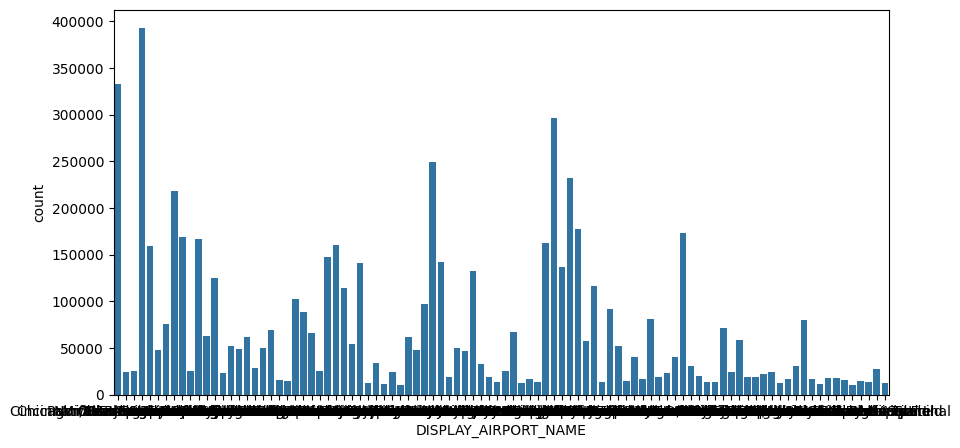

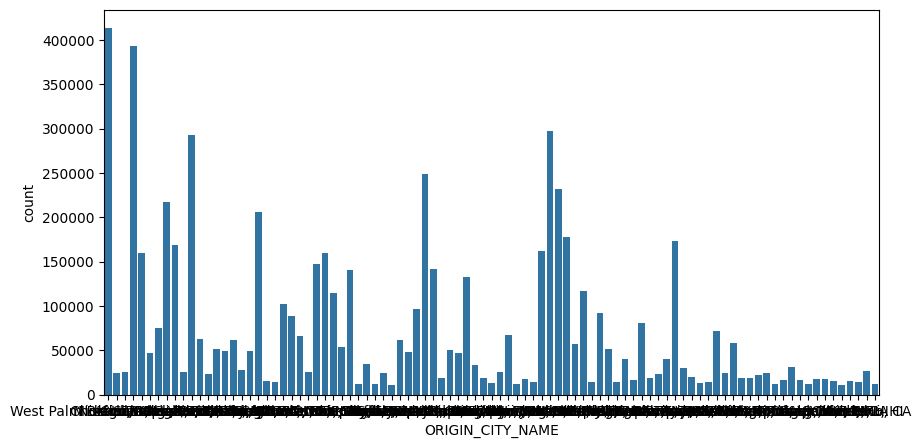

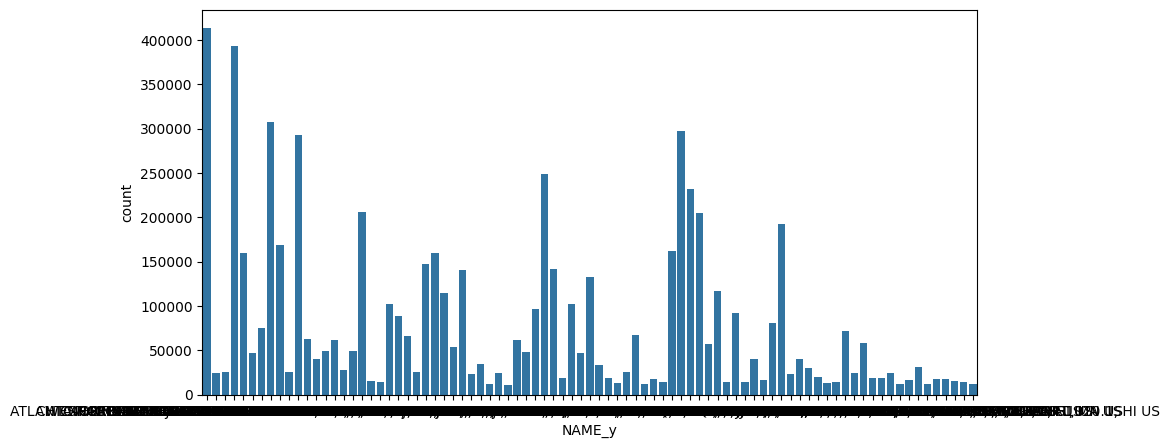

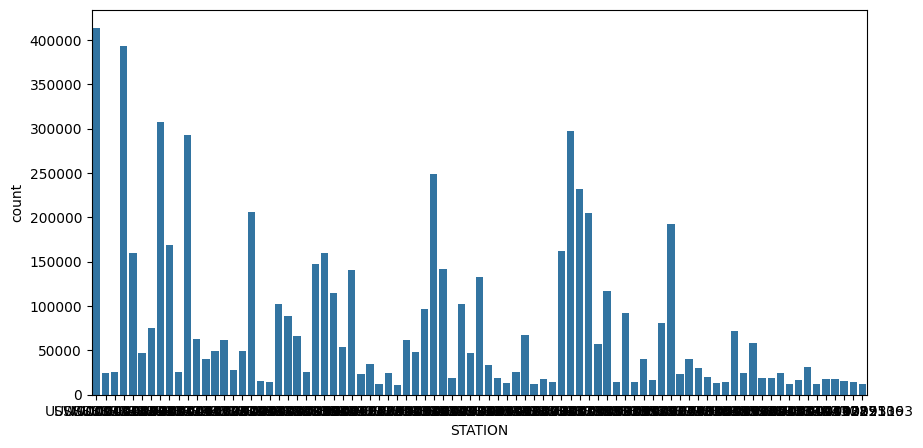

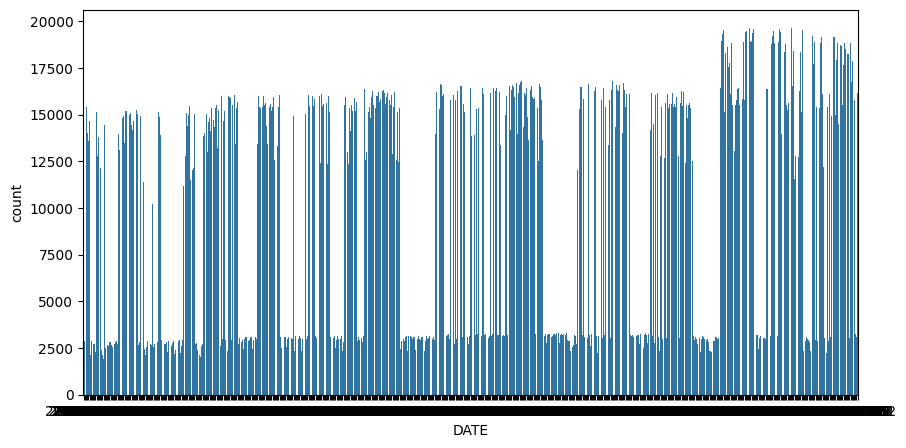

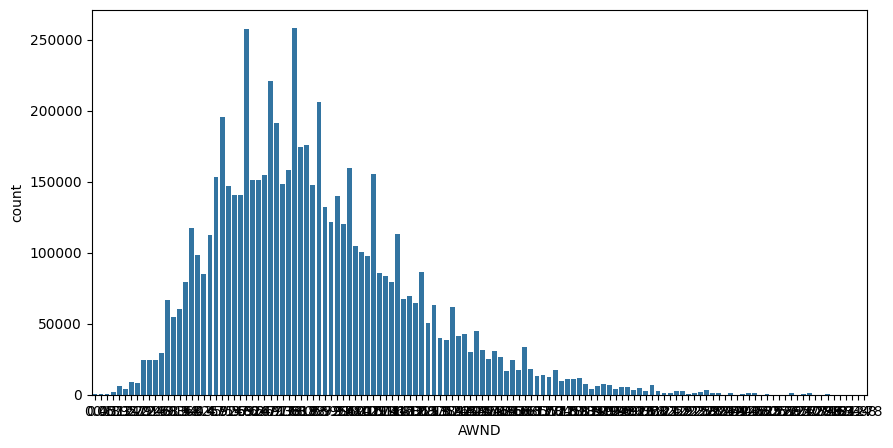

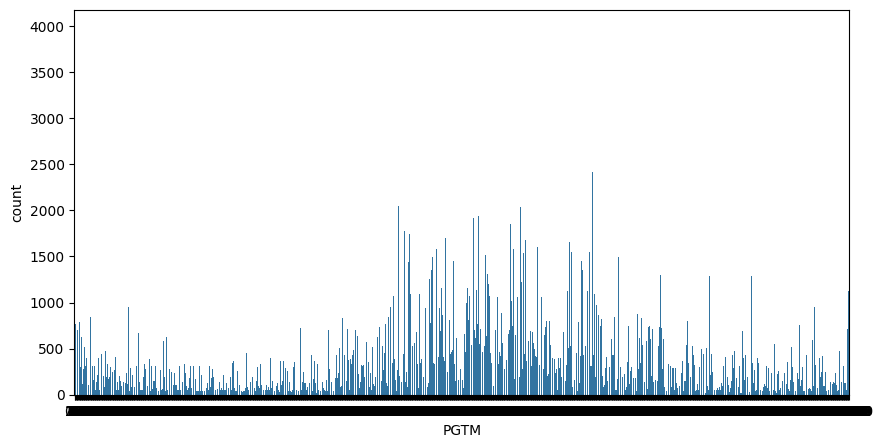

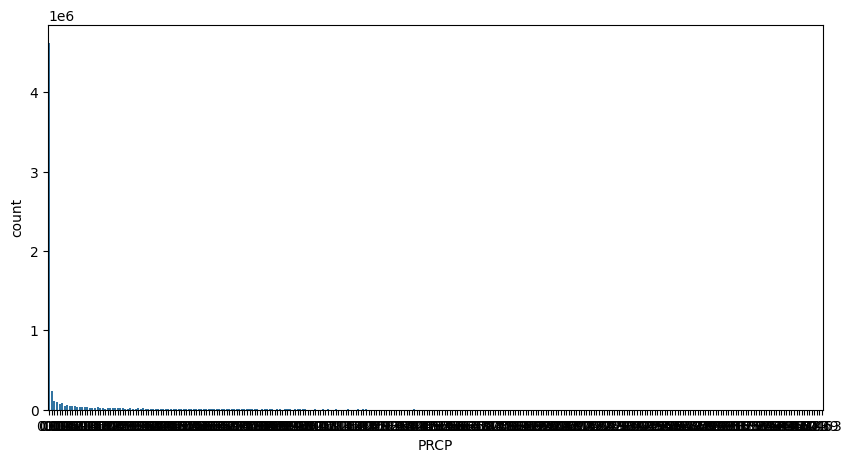

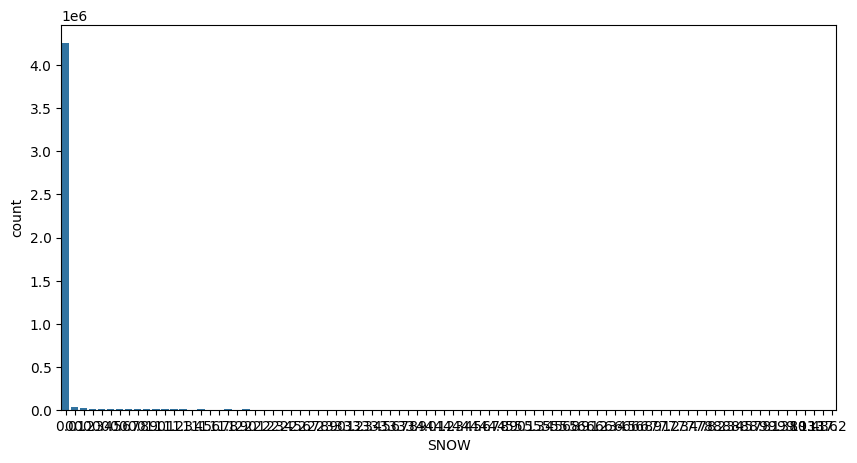

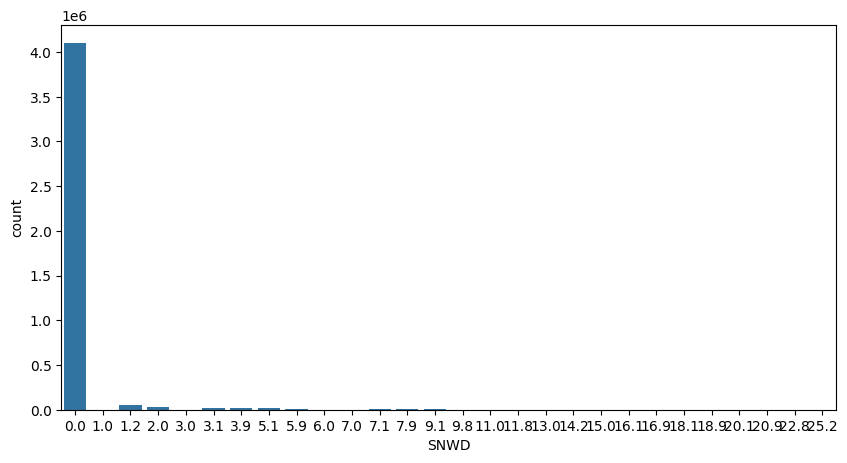

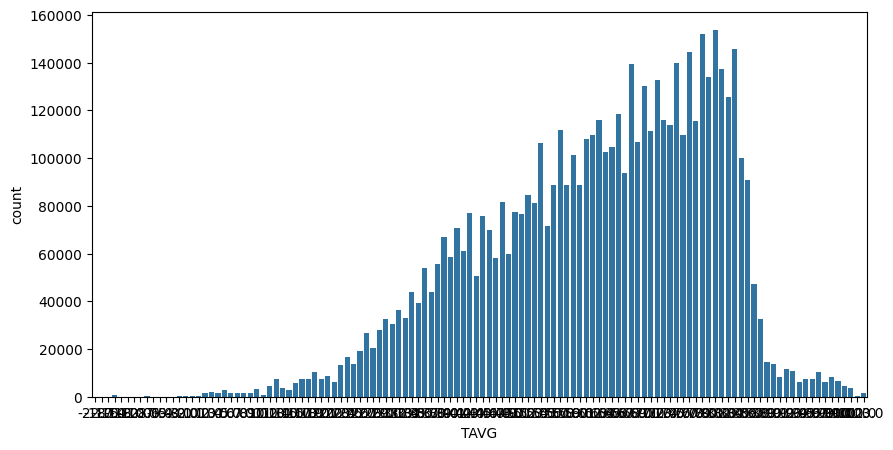

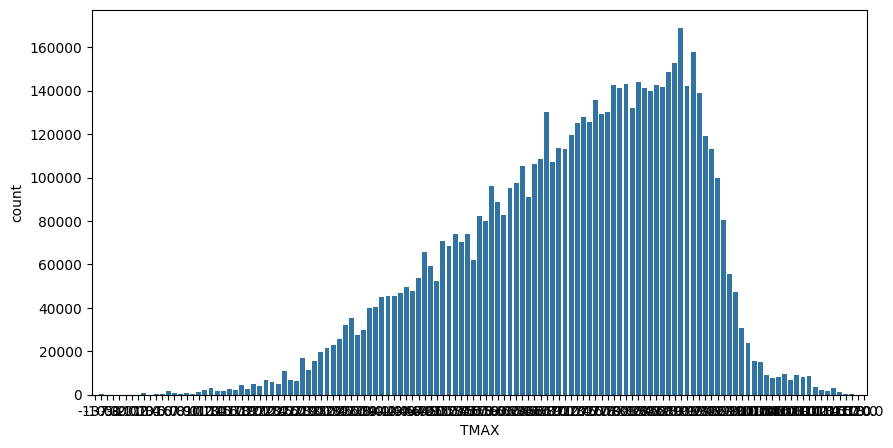

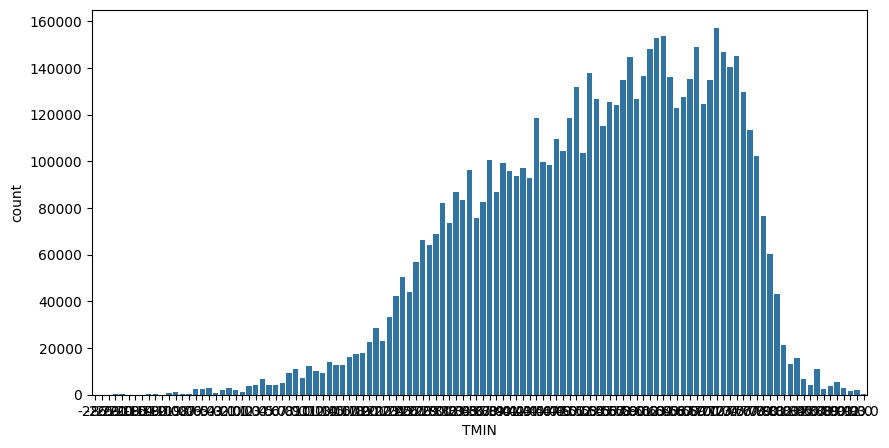

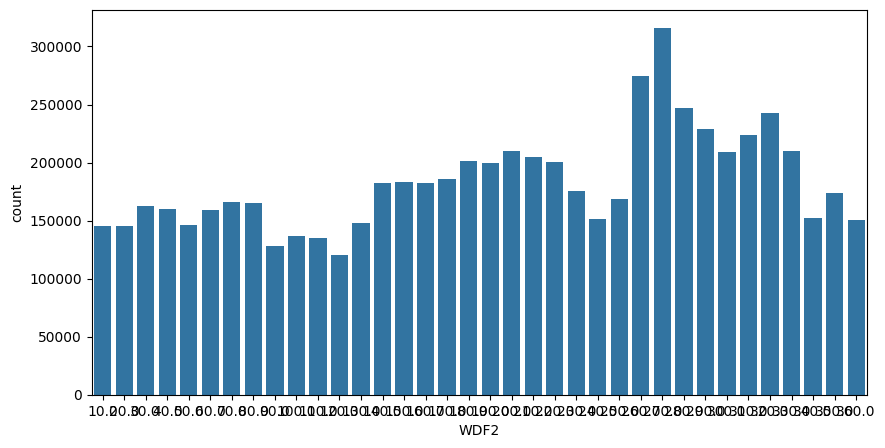

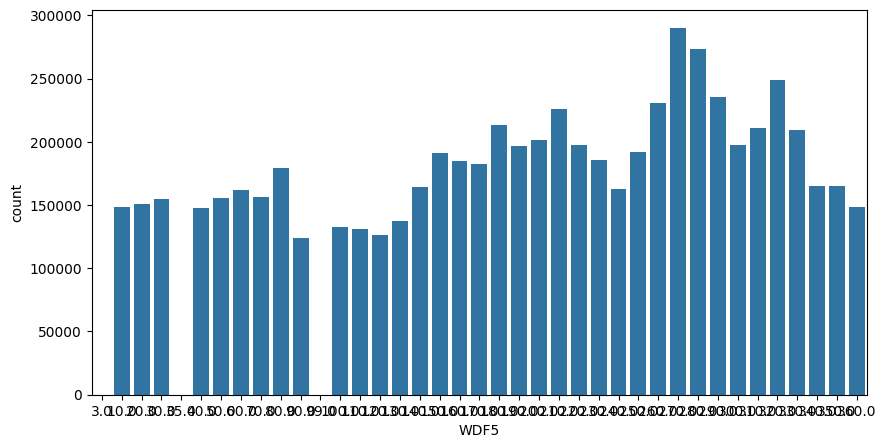

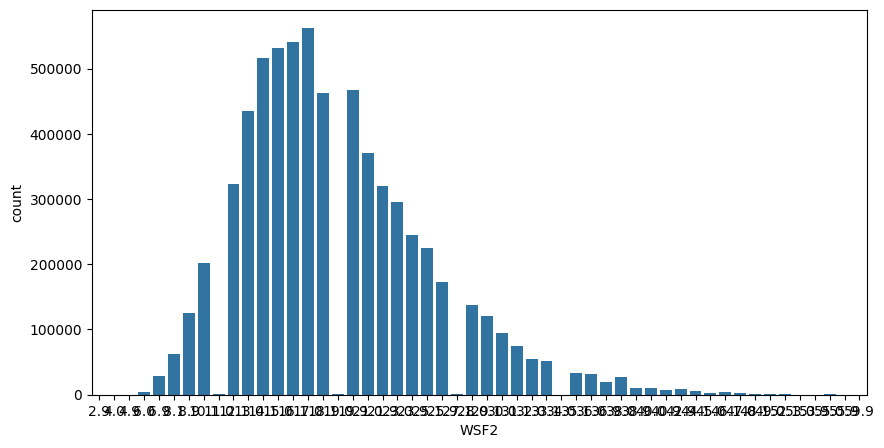

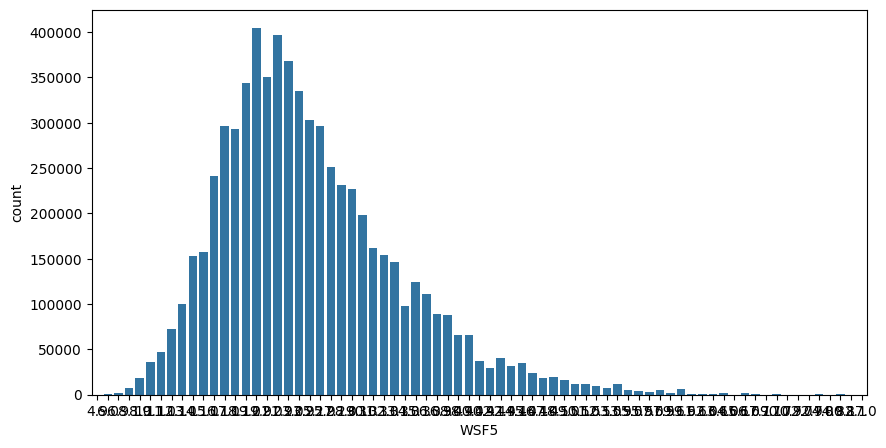

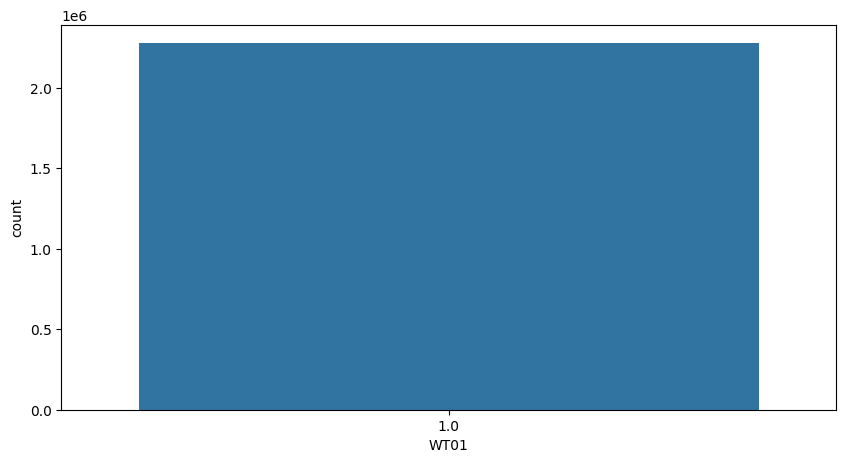

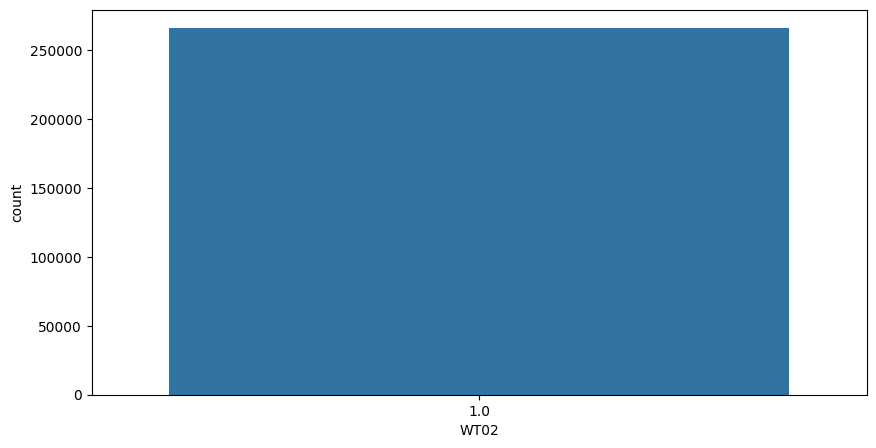

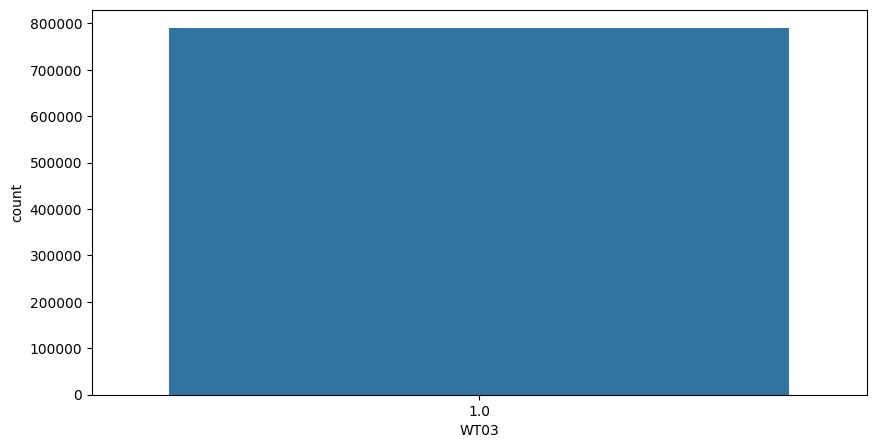

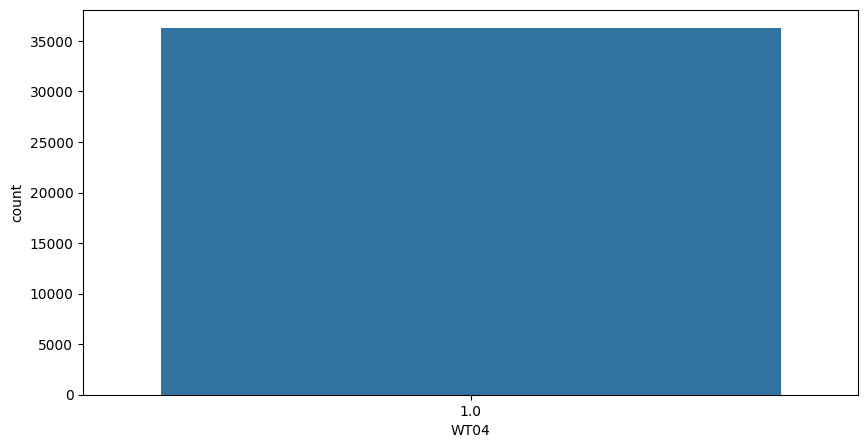

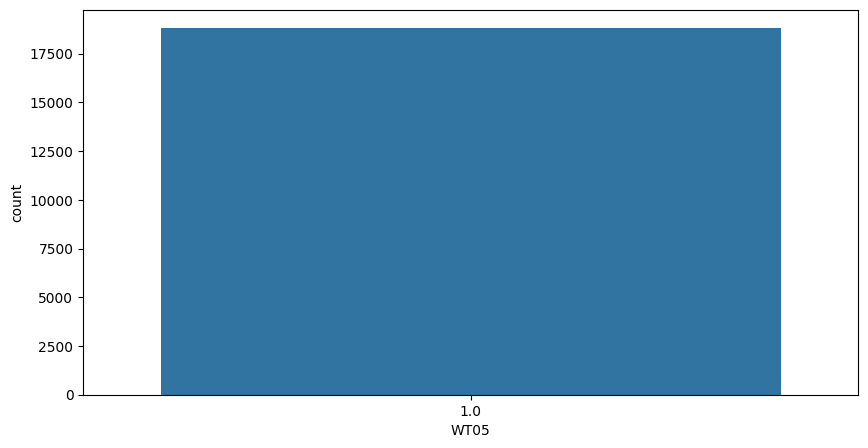

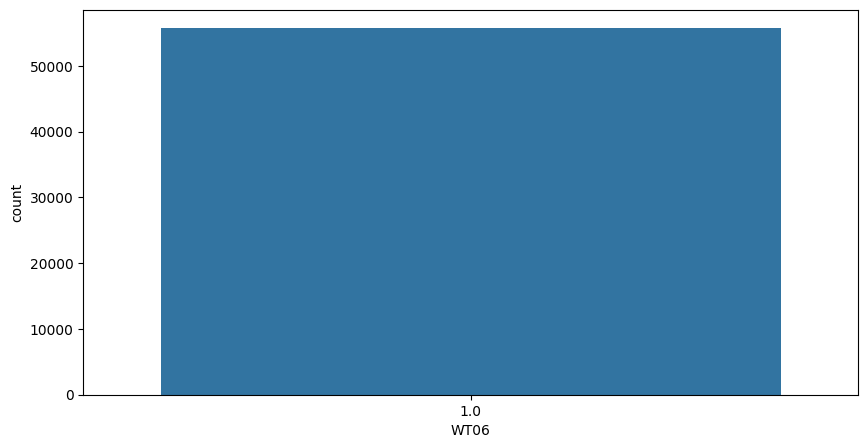

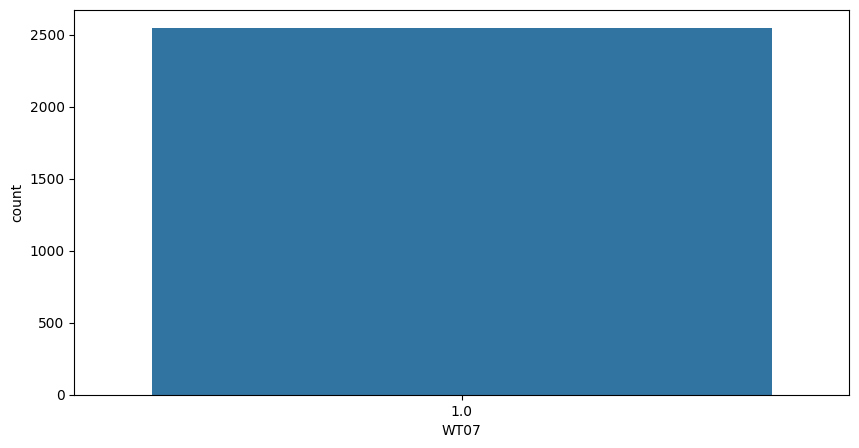

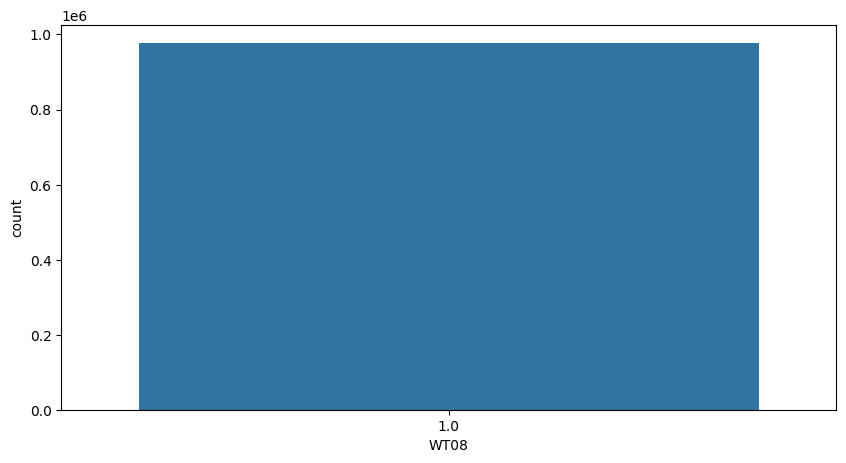

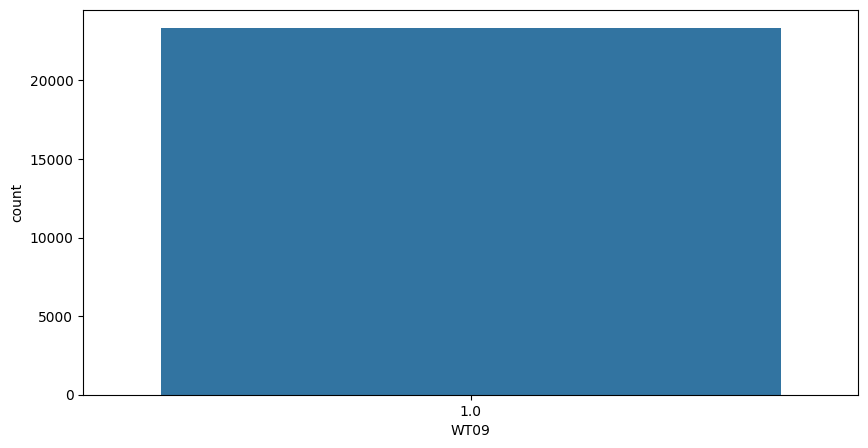

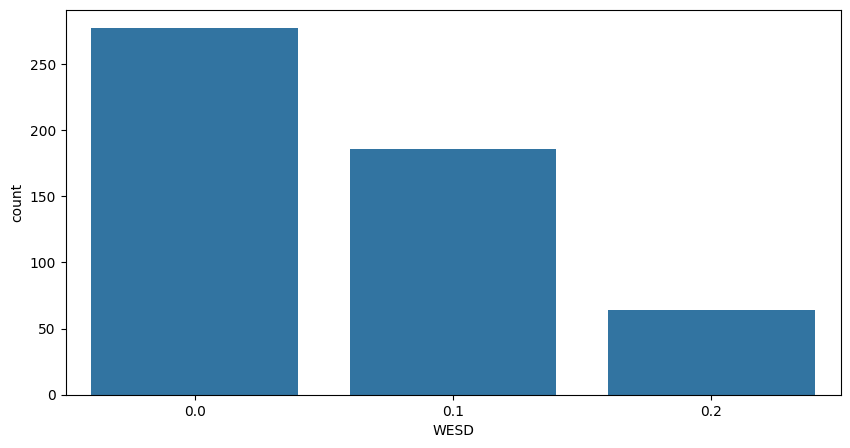

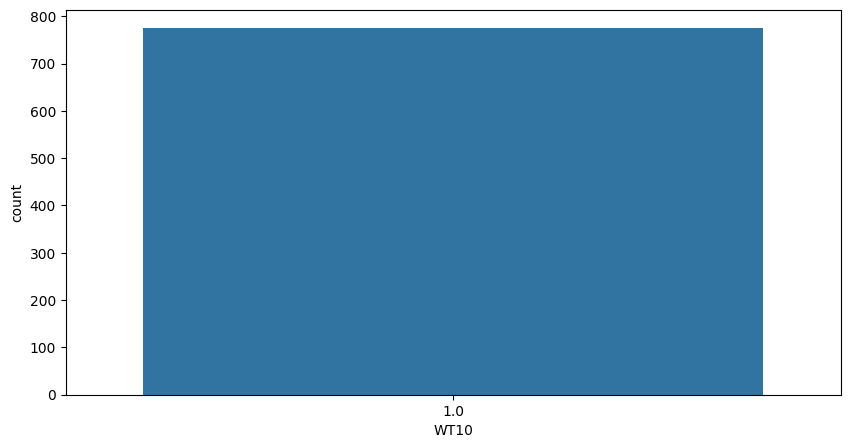

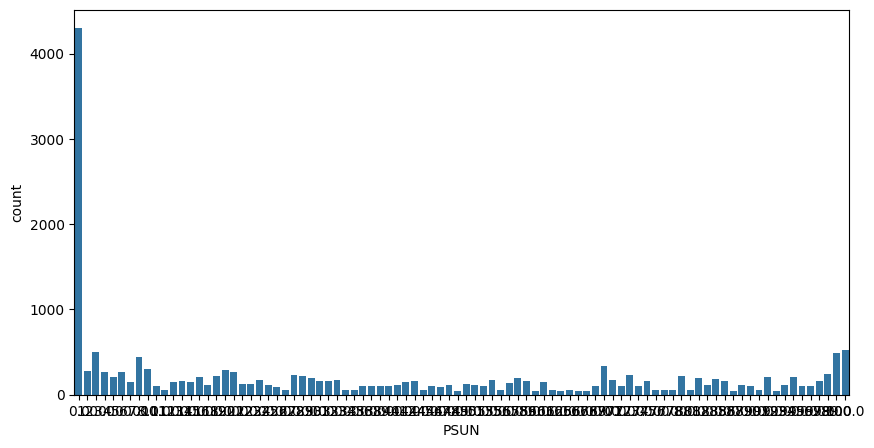

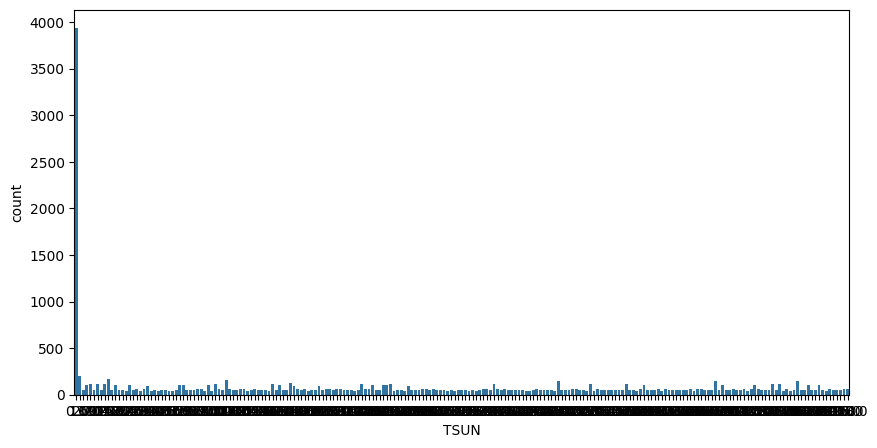

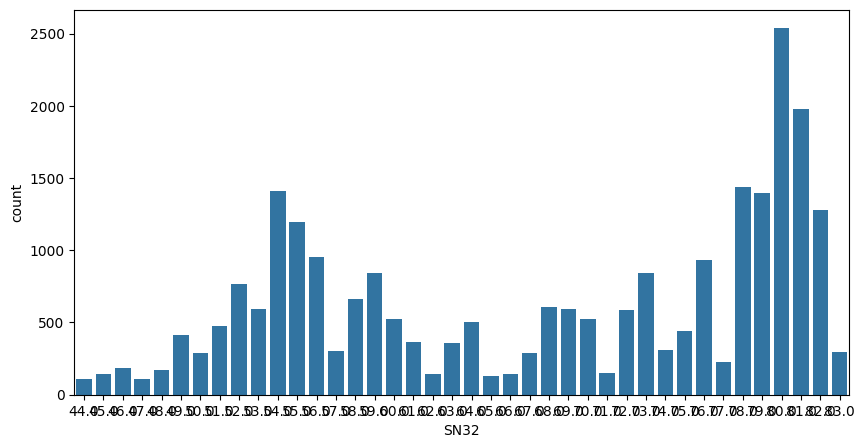

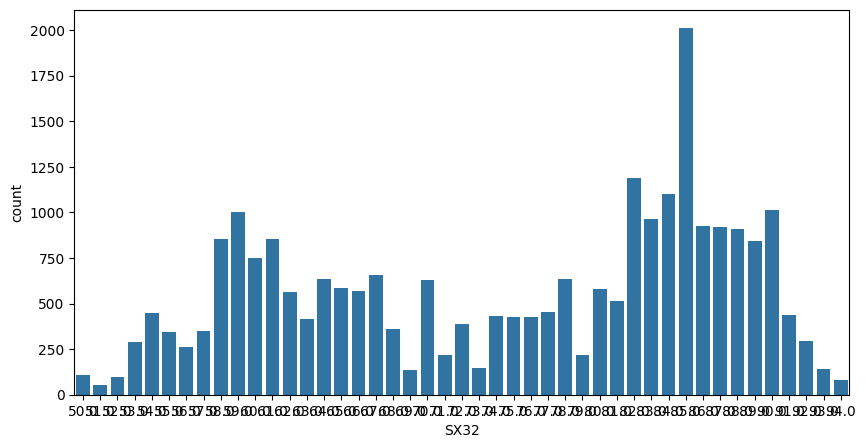

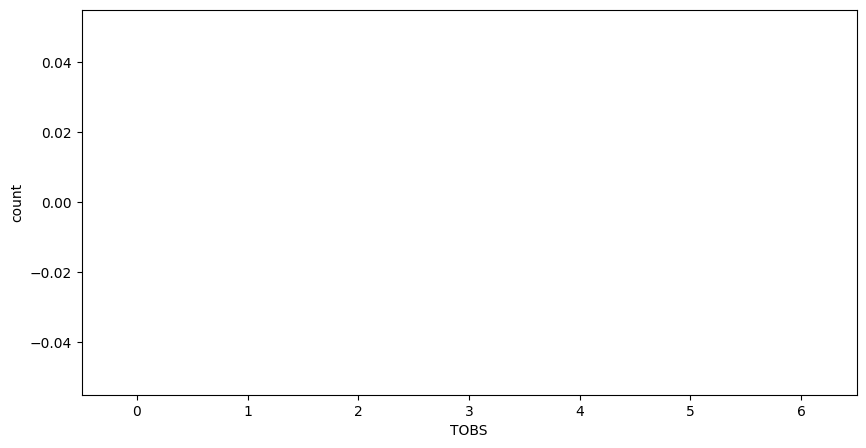

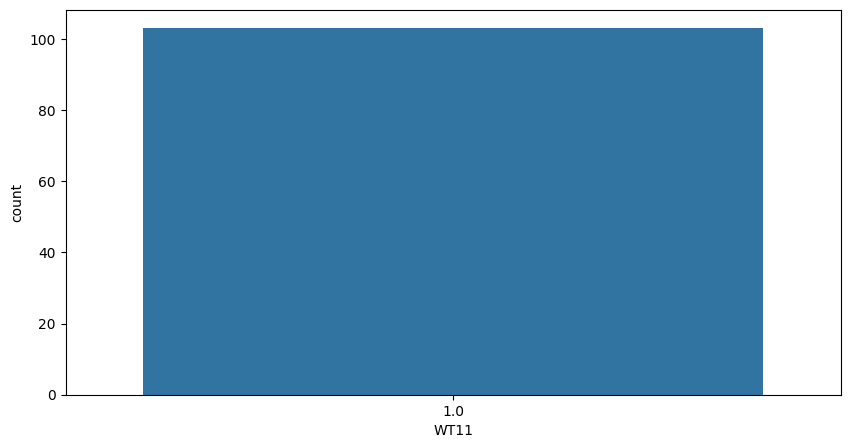

In [5]:
#count plot for every column
for col in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df)
    plt.show()

### Better EDA

In [6]:
# select numerical columns
num_feats = df.select_dtypes(include=['int64', 'float64']).columns
# Find the sum of null values in each numerical column that are more than 1000
df[num_feats].isnull().sum()[df[num_feats].isnull().sum() > 100000].sort_values(ascending=False)/len(df)

TOBS                   1.000000
Unnamed: 32            1.000000
WT11                   0.999984
WESD                   0.999920
WT10                   0.999882
WT07                   0.999614
TSUN                   0.997339
PSUN                   0.997287
WT05                   0.997146
WT09                   0.996462
SX32                   0.996174
SN32                   0.996174
WT04                   0.994499
WT06                   0.991546
WT02                   0.959697
PGTM                   0.936734
WT03                   0.880185
WT08                   0.851807
WEATHER_DELAY          0.808094
LATE_AIRCRAFT_DELAY    0.808094
SECURITY_DELAY         0.808094
NAS_DELAY              0.808094
CARRIER_DELAY          0.808094
WT01                   0.654436
SNWD                   0.350263
SNOW                   0.328308
TAVG                   0.141304
NUMBER_OF_SEATS        0.035447
dtype: float64

In [8]:
# create copy of df
df_copy = df.copy()

In [20]:
# Find the sum of null values in each numerical column that are more than 80%
null_num_feats = df[num_feats].isnull().sum()[df[num_feats].isnull().sum() > 100000].sort_values(ascending=False)/len(df) > 0.8
# Drop columns with more than 80% null values
df_copy.drop(null_num_feats[null_num_feats == True].index, axis=1, inplace=True)

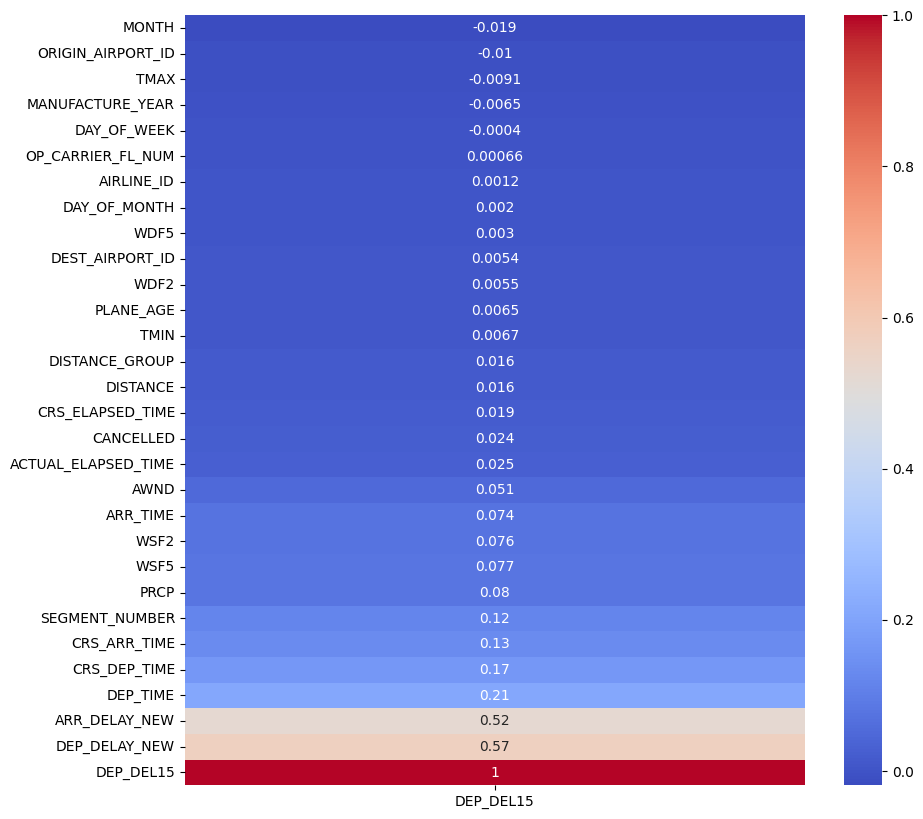

In [21]:
# select numerical columns again from copy
num_feats = df_copy.select_dtypes(include=['int64', 'float64']).columns
# heatmap of correlation between numerical columns and DEP_DEL15
plt.figure(figsize=(10,10))
sns.heatmap(df_copy[num_feats].corr()[['DEP_DEL15']].sort_values('DEP_DEL15'), annot=True, cmap='coolwarm')
plt.show()

## Preprocessing

In [3]:
print("Let's preprocess")
print("NO")

Let's preprocess


## Training

## Evaluation